# NET 2020

## 5. Lambdas, delegates, events

### 5.2. Exercise

In this exercise, you should:

1. Implement the class hierarchy from the UML diagram
2. Create unit tests and get 100% code coverage

#### UML

In [1]:
import iplantuml

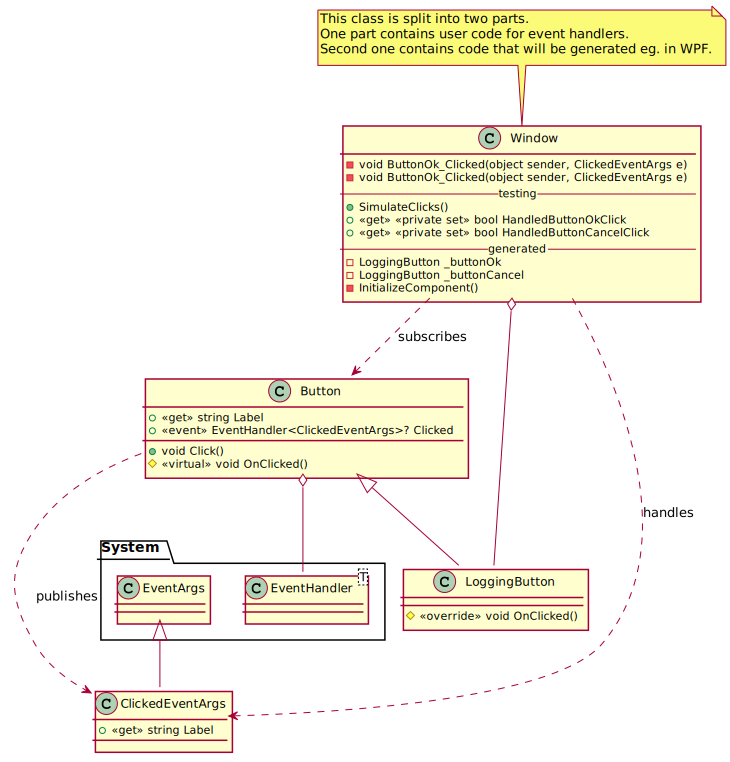

In [2]:
%%plantuml

@startuml

class Button {
+ <<get>> string Label
+ <<event>> EventHandler<ClickedEventArgs>? Clicked
+ void Click()
# <<virtual>> void OnClicked()
}

namespace System {
class EventHandler<T>
}

Button o-- System.EventHandler

class LoggingButton {
# <<override>> void OnClicked()
}

Button <|-- LoggingButton

namespace System {
class EventArgs
}

class ClickedEventArgs {
+ <<get>> string Label
}

System.EventArgs <|-- ClickedEventArgs

class Window {
- void ButtonOk_Clicked(object sender, ClickedEventArgs e)
- void ButtonOk_Clicked(object sender, ClickedEventArgs e)
-- testing --
+ SimulateClicks()
+ <<get>> <<private set>> bool HandledButtonOkClick
+ <<get>> <<private set>> bool HandledButtonCancelClick
-- generated --
- LoggingButton _buttonOk
- LoggingButton _buttonCancel
- InitializeComponent()
}

note as WindowNote
This class is split into two parts.
One part contains user code for event handlers.
Second one contains code that will be generated eg. in WPF.
end note

WindowNote -- Window

Window o-- LoggingButton

Button ..> ClickedEventArgs : publishes
Window ..> ClickedEventArgs : handles
Window ..> Button : subscribes

@enduml

Final project structure in my solution:

```bash
project/
├── App
│   ├── App.csproj
│   └── Program.cs
├── project.sln
├── Test
│   ├── ButtonTest.cs
│   ├── LoggingButtonTest.cs
│   ├── Test.csproj
│   └── WindowTest.cs
└── Utils
    ├── Button.cs
    ├── ClickedEventArgs.cs
    ├── LoggingButton.cs
    ├── Utils.csproj
    ├── Window.cs
    └── Window.generated.cs

3 directories, 13 files
```

The ```Window``` is a partial class.

To start editing the code:

In [ ]:
! rider project/project.sln